C:\Users\Adarsh Sharma\AppData\Local\Temp\ipykernel_47752\2076691298.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Adarsh Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error: 21.63447246236672


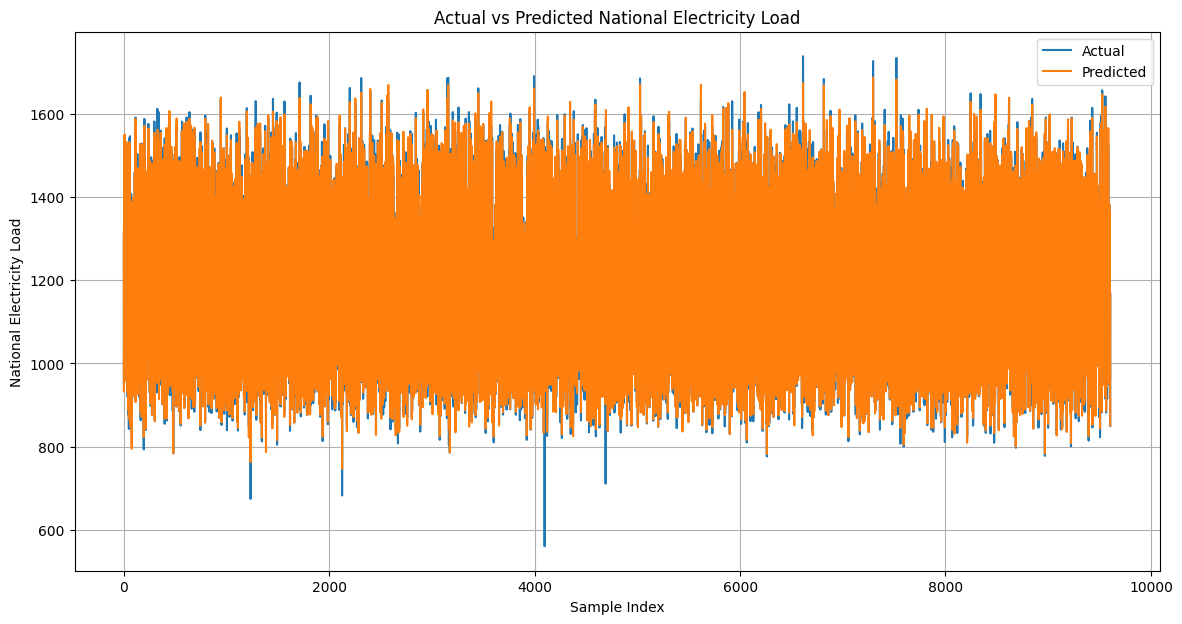

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load the dataset
file_path = 'continuous dataset.csv'  # Update the file path as needed
data = pd.read_csv(file_path)

# Convert the 'datetime' column to a datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M')

# Extracting date and time features
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month

# Create lag features for 'nat_demand'
for lag in range(1, 25):  # Creating lag features for the past 24 hours
    data[f'nat_demand_lag_{lag}'] = data['nat_demand'].shift(lag)

# Create rolling statistics features for 'nat_demand'
data['rolling_mean_24h'] = data['nat_demand'].rolling(window=24).mean()
data['rolling_std_24h'] = data['nat_demand'].rolling(window=24).std()

# Drop rows with NaN values created due to lag and rolling features
data = data.dropna()

# Prepare the data for modeling
X = data.drop(columns=['datetime', 'nat_demand'])
y = data['nat_demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('National Electricity Load')
plt.title('Actual vs Predicted National Electricity Load')
plt.legend()
plt.grid(True)
plt.show()
